# 第3章 Pandas数据处理

Pandas是在NumPy基础上建立的新程序库，提供了一种高效的DataFrame数据结构。
DataFrame本质上是一种带行标签和列标签、支持同类型数据和缺失值的多维数组。

## 3.1 安装并使用Pandas

In [1]:
import pandas
pandas.__version__

'1.5.3'

In [2]:
import pandas as pd

## 3.2 Pandas对象简介

Pandas的基本数据结构：Series、DataFrame、Index

In [3]:
import numpy as np
import pandas as pd

### 3.2.1 Pandas的Series对象

Pandas的Series对象是带索引数据构成的一维数组。

In [4]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64


In [5]:
data.values, data.index

(array([0.25, 0.5 , 0.75, 1.  ]), RangeIndex(start=0, stop=4, step=1))

In [6]:
data[1]

0.5

In [7]:
data[1:3]

1    0.50
2    0.75
dtype: float64


#### 1. Series是通用的NumPy数组

NumPy 数组通过*隐式定义的*整数索引获取数值，
而 Pandas 的Series 对象用一种*显式定义的*索引与数值关联。

In [8]:
# 用字符串定义索引
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [9]:
data['b']

0.5

In [10]:
# 使用不连续或不按顺序的索引
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

#### 2. Series是特殊的字典


In [11]:
# 直接用 Python 的字典创建一个 Series 对象
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [12]:
population['California']

38332521

In [13]:
# 和字典不同，Series 对象还支持数组形式的操作，比如切片
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

#### 3. 创建Series对象

In [14]:
# pd.Series(data, index=index) index 是一个可选参数，data 参数支持多种数据类型。
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [15]:
# data 也可以是一个标量，创建 Series 对象时会重复填充到每个索引上
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [16]:
# data 还可以是一个字典，index 默认是排序的字典键
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [17]:
# 通过显式指定索引筛选需要的结果
pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])

3    c
2    a
dtype: object

### 3.2.2 Pandas的DataFrame对象

DataFrame 既可以作为一个通用型 NumPy 数组，也可以看作特殊的 Python 字典。

#### 1. DataFrame是通用的NumPy数组

In [18]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [19]:
states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [20]:
states.index,states.columns

(Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object'),
 Index(['population', 'area'], dtype='object'))

DataFrame 可以看作一种通用的 NumPy 二维数组，它的行与列都可以通过索引获取。

#### 2. DataFrame是特殊的字典

字典是一个键映射一个值，而 DataFrame 是一列映射一个 Series 的数据。

In [21]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [22]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

#### 3. 创建DataFrame对象

(1) 通过单个 Series 对象创建。DataFrame 是一组 Series 对象的集合，可以用单个 Series
创建一个单列的 DataFrame：

In [23]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


(2) 通过字典列表创建。任何元素是字典的列表都可以变成 DataFrame。用一个简单的列表
综合来创建一些数据：

In [24]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [25]:
# 即使字典中有些键不存在，Pandas 也会用缺失值 NaN（不是数字，not a number）来表示
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


(3) 通过 Series 对象字典创建。

In [26]:
pd.DataFrame({'population': population,
              'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


(4) 通过 NumPy 二维数组创建

In [27]:
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.457635,0.122245
b,0.967637,0.268792
c,0.788449,0.631797


(5) 通过 NumPy 结构化数组创建。

In [28]:
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [29]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


### 3.2.3 Pandas的Index对象

Series 和 DataFrame 对象都使用便于引用和调整的显式索引。Pandas 的
Index 对象是一个很有趣的数据结构，可以将它看作是一个不可变数组或有序集合（实际
上是一个多集，因为 Index 对象可能会包含重复值）

In [30]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Int64Index([2, 3, 5, 7, 11], dtype='int64')

#### 1. 将Index看作不可变数组

In [31]:
ind[1]

3

In [32]:
ind[::2]

Int64Index([2, 5, 11], dtype='int64')

In [33]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


#### 2. 将Index看作有序集合

Pandas 对象被设计用于实现许多操作，如连接（join）数据集，其中会涉及许多集合操作。
Index 对象遵循 Python 标准库的集合（set）数据结构的许多习惯用法，包括并集、交集、差集

In [34]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [35]:
# indA & indB # deprecated
indA.intersection(indB)

Int64Index([3, 5, 7], dtype='int64')

In [36]:
# indA | indB # 并集
indA.union(indB)

Int64Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [37]:
# indA ^ indB # 异或
indA.symmetric_difference(indB)

Int64Index([1, 2, 9, 11], dtype='int64')

## 3.3 数据取值与选择

### 3.3.1 Series数据选择方法

#### 1. 将Series看作字典

In [38]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [39]:
data['b']

0.5

In [40]:
# 可以用 Python 字典的表达式和方法来检测键 / 索引和值：
'a' in data

True

In [41]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [42]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [43]:
# Series 对象还可以用字典语法调整数据
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### 2. 将Series看作一维数组

In [44]:
# 将显式索引作为切片
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [45]:
# 将隐式整数索引作为切片
data[0:2]

a    0.25
b    0.50
dtype: float64

In [46]:
# 掩码
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [47]:
# 花哨的索引
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### 3. 索引器：loc、iloc和ix

In [48]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [49]:
# 取值操作是显式索引
data[1]

'a'

In [50]:
# 切片操作是隐式索引
data[1:3]

3    b
5    c
dtype: object

In [51]:
# 由于整数索引很容易造成混淆，所以 Pandas 提供了一些索引器（indexer）属性来作为取值
# 的方法。它们不是 Series 对象的函数方法，而是暴露切片接口的属性。

# 第一种索引器是 loc 属性，表示取值和切片都是显式的：
data.loc[1]

'a'

In [52]:
data.loc[1:3]

1    a
3    b
dtype: object

In [53]:
# 第二种是 iloc 属性，表示取值和切片都是 Python 形式的隐式索引：
data.iloc[1]

'b'

In [54]:
data.iloc[1:3]

3    b
5    c
dtype: object

第三种取值属性是 ix，它是前两种索引器的混合形式，在 Series 对象中 ix 等价于标准的[]（Python 列表）取值方式。ix 索引器主要用于 DataFrame 对象

### 3.3.2 DataFrame数据选择方法

#### 1. 将DataFrame看作字典

In [55]:
# 第一种类比是把 DataFrame 当作一个由若干 Series 对象构成的字典。
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'New York': 141297, 'Florida': 170312,
                  'Illinois': 149995})
pop = pd.Series({'California': 38332521, 'Texas': 26448193,
                 'New York': 19651127, 'Florida': 19552860,
                 'Illinois': 12882135})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [56]:
# 两个 Series 分别构成 DataFrame 的一列，可以通过对列名进行字典形式（dictionary-style）的取值获取数据
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [57]:
# 也可以用属性形式（attribute-style）选择纯字符串列名的数据：
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [58]:
# 对同一个对象进行属性形式与字典形式的列数据，结果是相同的：
data.area is data['area']

True

虽然属性形式的数据选择方法很方便，但是它并不是通用的。如果列名不是纯字符串，或
者列名与 DataFrame 的方法同名，那么就不能用属性索引。例如，DataFrame 有一个 pop()
方法，如果用 data.pop 就不会获取 'pop' 列，而是显示为方法：

In [59]:
data.pop is data['pop']

False

In [60]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### 2. 将DataFrame看作二维数组

In [61]:
print(data.values)

[[4.23967000e+05 3.83325210e+07 9.04139261e+01]
 [6.95662000e+05 2.64481930e+07 3.80187404e+01]
 [1.41297000e+05 1.96511270e+07 1.39076746e+02]
 [1.70312000e+05 1.95528600e+07 1.14806121e+02]
 [1.49995000e+05 1.28821350e+07 8.58837628e+01]]


In [62]:
# 行列转置
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


In [63]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [64]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [65]:
# 通过 iloc 索引器，我们就可以像对待 NumPy 数组一样索引 Pandas
# 的底层数组（Python 的隐式索引），DataFrame 的行列标签会自动保留在结果中：
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [66]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [67]:
# data.ix[:3, :'pop'] # pandas版本0.20.0及其以后版本中，ix已经不被推荐使用
pandas.__version__

'1.5.3'

In [68]:
# 任何用于处理 NumPy 形式数据的方法都可以用于这些索引器。例如，可以在 loc 索引器
# 中结合使用掩码与花哨的索引方法：
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


In [69]:
# 任何一种取值方法都可以用于调整数据，这一点和 NumPy 的常用方法是相同的：
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


#### 3. 其他取值方法

In [70]:
# 如果对单个标签取值就选择列，而对多个标签用切片就选择行
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


In [71]:
# 切片也可以不用索引值，而直接用行数来实现
data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [72]:
# 掩码操作也可以直接对每一行进行过滤，而不需要使用 loc 索引器
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


## 3.4 Pandas数值运算方法

### 3.4.1 通用函数：保留索引

Pandas 是建立在 NumPy 基础之上的，所以 NumPy 的通用函数同样适用于 Pandas 的
Series 和 DataFrame 对象。

In [73]:
import pandas as pd
import numpy as np

In [74]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int32

In [75]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [76]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [77]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### 3.4.2 通用函数：索引对齐

#### 1. Series索引对齐

In [78]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
                  'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
                        'New York': 19651127}, name='population')

In [79]:
# 结果数组的索引是两个输入数组索引的并集
population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

In [80]:
area.index.union(population.index)

Index(['Alaska', 'California', 'New York', 'Texas'], dtype='object')

In [81]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

In [82]:
# 如果用 NaN 值不是我们想要的结果，那么可以用适当的对象方法代替运算符。例如，
# A.add(B) 等价于 A + B，也可以设置参数自定义 A 或 B 缺失的数据：
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

#### 2. DataFrame索引对齐

In [83]:
A = pd.DataFrame(rng.randint(0, 20, (2, 2)),
                 columns=list('AB'))
A

,A,B
0,1,11
1,5,1


In [84]:
B = pd.DataFrame(rng.randint(0, 10, (3, 3)),
                 columns=list('BAC'))
B

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [85]:
A + B

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


In [86]:
# 两个对象的行列索引可以是不同顺序的，结果的索引会自动按顺序排列。在
# Series 中，我们可以通过运算符方法的 fill_value 参数自定义缺失值。这里，我们将用 A
# 中所有值的均值来填充缺失值（计算 A 的均值需要用 stack 将二维数组压缩成一维数组）：

fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


* 表3-1：Python运算符与Pandas方法的映射关系

| Python运算符 | Pandas方法                 |
|-----------|--------------------------|
| +         | add()                    |
| -         | sub()、subtract()         |
| *         | mul()、multiply()         |
| /         | truediv()、div()、divide() |
| //        | floordiv()               |
| %         | mod()                    |
| **        | pow()                    |

#### 3.4.3 通用函数：DataFrame与Series的运算

DataFrame 和 Series 的运算规则，与 NumPy 中二维数组与一维数组的运算规则是一样的。

In [87]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [88]:
# 根据 NumPy 的广播规则（详情请参见 2.5 节），让二维数组减自身的一行数据会按行计算。
# 3x4 矩阵A - 1x4矩阵A[0]，A[0]扩展行向量，变成4X4矩阵
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [89]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[0]

,Q,R,S,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [90]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [91]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int32

In [92]:
df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


## 3.5 处理缺失值

缺失值主要有三种形式：null、NaN 或 NA。

### 3.5.1 选择处理缺失值的方法

在数据表或 DataFrame 中有很多识别缺失值的方法。一般情况下可以分为两种：
一种方法是通过一个覆盖全局的*掩码*表示缺失值，另一种方法是用一个标签值（sentinel value）表
示缺失值。

### 3.5.2 Pandas的缺失值

Pandas 最终选择用标签方法表示缺失值，包括两种 Python 原有的缺失值：浮点数据类型的 NaN 值，以及 Python 的 None 对象。

#### 1. None：Python对象类型的缺失值

Pandas 可以使用的第一种缺失值标签是 None，它是一个 Python 单体对象，经常在代码中
表示缺失值。由于 None 是一个 Python 对象，所以不能作为任何 NumPy / Pandas 数组类型
的缺失值，只能用于 'object' 数组类型（即由 Python 对象构成的数组）

In [93]:
import numpy as np
import pandas as pd

In [94]:
vals1 = np.array([1, None, 3, 4])
vals1,

(array([1, None, 3, 4], dtype=object),)

In [95]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
58.7 ms ± 5.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
1.76 ms ± 170 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



In [96]:
# 使用 Python 对象构成的数组就意味着如果你对一个包含 None 的数组进行累计操作，如
# sum() 或者 min()，那么通常会出现类型错误：
# vals1.sum()

#### 2. NaN：数值类型的缺失值

In [97]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

In [98]:
1 + np.nan

nan

In [99]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [100]:
# NumPy 也提供了一些特殊的累计函数，它们可以忽略缺失值的影响：
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

NaN 是一种特殊的浮点数，不是整数、字符串以及其他数据类型。

#### 3. Pandas中NaN与None的差异

虽然 NaN 与 None 各有各的用处，但是 Pandas 把它们看成是可以等价交换的，在适当的时
候会将两者进行替换：

In [101]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [102]:
# Pandas 会将没有标签值的数据类型自动转换为 NA。
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [103]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

* 表3-2：Pandas对不同类型缺失值的转换规则

| 类型       |  缺失值转换规则 | NA标签值                      |
|----------|----------|----------------------------|
| floating | 浮点型      | 无变化 np.nan                 |
| object   | 对象类型     | 无变化 None 或 np.nan          |
| integer  | 整数类型     | 强制转换为 float64 np.nan       |
| boolean  | 布尔类型     | 强制转换为 object None 或 np.nan |

### 3.5.3 处理缺失值

andas 基本上把 None 和 NaN 看成是可以等价交换的缺失值形式。为了完成
这种交换过程，Pandas 提供了一些方法来发现、剔除、替换数据结构中的缺失值。

* isnull()
    * 创建一个布尔类型的掩码标签缺失值。
* notnull()
    * 与 isnull() 操作相反。
* dropna()
    * 返回一个剔除缺失值的数据。
* fillna()
    * 返回一个填充了缺失值的数据副本。

#### 1. 发现缺失值

In [104]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [105]:
data[data.notnull()]

0        1
2    hello
dtype: object

#### 2. 剔除缺失值

dropna()（剔除缺失值）和 fillna()（填充缺失值）

In [106]:
data.dropna()

0        1
2    hello
dtype: object

In [107]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [108]:
# 默认情况下，dropna() 会剔除任何包含缺失值的整行数据
df.dropna()

,0,1,2
1,2.0,3.0,5


In [109]:
# 可以设置按不同的坐标轴剔除缺失值，比如 axis=1（或 axis='columns'）会剔除任何包含缺失值的整列数据
df.dropna(axis='columns')

,2
0,2
1,5
2,6


但是这么做也会把非缺失值一并剔除，因为可能有时候只需要剔除全部是缺失值的行或
列，或者绝大多数是缺失值的行或列。这些需求可以通过设置 how 或 thresh 参数来满足，
它们可以设置剔除行或列缺失值的数量阈值。
默认设置是 how='any'，也就是说只要有缺失值就剔除整行或整列（通过 axis 设置坐标
轴）。你还可以设置 how='all'，这样就只会剔除全部是缺失值的行或列了：

In [110]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [111]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [112]:
# 可以通过 thresh 参数设置行或列中非缺失值的最小数量，从而实现更加个性化的配置：
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### 3. 填充缺失值


In [113]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [114]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [115]:
# 可以用缺失值前面的有效值来从前往后填充（forward-fill）：
# 从前往后填充
data.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [116]:
# 用缺失值后面的有效值来从后往前填充（back-fill）：
# 从后往前填充
data.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [117]:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [118]:
# DataFrame 的操作方法与 Series 类似，只是在填充时需要设置坐标轴参数 axis：
df.fillna(method='ffill', axis=1)

,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


## 3.6 层级索引

通过层级索引（hierarchical indexing，也被称为多级索引，
multi-indexing）配合多个有不同等级（level）的一级索引一起使用，这样就可以将高维数
组转换成类似一维 Series 和二维 DataFrame 对象的形式。

### 3.6.1 多级索引Series

In [119]:
import pandas as pd
import numpy as np

#### 1. 笨办法

In [120]:
index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [121]:
# 通过元组构成的多级索引，你可以直接在 Series 上取值或用切片查询数据：
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [122]:
# 所有 2000 年的数据
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

#### 2. 好办法：Pandas多级索引

用元组表示索引其实是多级索引的基础，Pandas的 MultiIndex 类型提供了更丰富的操作方法。

In [123]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [124]:
# pop 的索引重置（reindex）为 MultiIndex，就会看到层级索引：
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [125]:
# 现在可以直接用第二个索引获取 2010 年的全部数据，与 Pandas 的切片查询用法一致：
pop[:, 2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

#### 3. 高维数据的多级索引

In [126]:
# 可以用一个带行列索引的简单 DataFrame 代替前面的多级索引。其实 Pandas 已经实现了类似的功能。
# unstack() 方法可以快速将一个多级索引的Series 转化为普通索引的 DataFrame：
pop_df = pop.unstack()
pop_df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [127]:
# stack() 方法实现相反的效果：
pop_df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

如果我们可以用含多级索引的一维 Series 数据表示二维数据，那么我们就可以用 Series 或 DataFrame 表示三维
甚至更高维度的数据。多级索引每增加一级，就表示数据增加一维，利用这一特点就可以轻松表示任意维度的数据了。

In [128]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [129]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

,2000,2010
California,0.273594,0.249211
New York,0.247010,0.222831
Texas,0.283251,0.273568


### 3.6.2 多级索引的创建方法

为 Series 或 DataFrame 创建多级索引最直接的办法就是将 index 参数设置为至少二维的索引数组

In [130]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.094335  0.391733
  2  0.055870  0.187684
b 1  0.608028  0.267439
  2  0.002501  0.511790

In [131]:
# 如果你把将元组作为键的字典传递给 Pandas，Pandas 也会默认转换为 MultiIndex：
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

#### 1. 显式地创建多级索引

In [132]:
# 通过一个有不同等级的若干简单数组组成的列表来构建 MultiIndex：
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [133]:
# 通过包含多个索引值的元组构成的列表创建 MultiIndex：
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [134]:
# 用两个索引的笛卡尔积（Cartesian product）创建 MultiIndex：
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [135]:
# 接提供 levels（包含每个等级的索引值列表的列表）和 labels（包含每个索引值签列表的列表）创建 MultiIndex：
# pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
#               labels=[[0, 0, 1, 1], [0, 1, 0, 1]])
# TypeError __new__() got an unexpected keyword argument 'labels'
# pd.MultiIndex?
# Changed in version 0.24.0: MultiIndex.labels has been renamed to MultiIndex.codes and MultiIndex.set_labels to MultiIndex.set_codes
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

#### 2. 多级索引的等级名称


In [136]:
# 给 MultiIndex 的等级加上名称会为一些操作提供便利。你可以在前面任何一个 MultiIndex
# 构造器中通过 names 参数设置等级名称，也可以在创建之后通过索引的 names 属性来修改名称：
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### 3. 多级列索引

In [137]:
# 多级行列索引
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])
# 模拟数据
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# 创建DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.8  47.0  36.3  35.0  36.6
     2      40.0  36.8  49.0  37.2  41.0  37.3
2014 1      22.0  38.5  45.0  36.7  39.0  37.0
     2      44.0  37.9  36.0  36.2  19.0  35.1

In [138]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      47.0  36.3
     2      49.0  37.2
2014 1      45.0  36.7
     2      36.0  36.2

### 3.6.3 多级索引的取值与切片

#### 1. Series多级索引

In [139]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [140]:
pop['California', 2000]

33871648

In [141]:
pop['California']

year
2000    33871648
2010    37253956
dtype: int64

In [142]:
pop.loc['California':'New York']

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
dtype: int64

In [143]:
pop[:, 2000]

state
California    33871648
New York      18976457
Texas         20851820
dtype: int64

In [144]:
pop[pop > 22000000]

state       year
California  2000    33871648
            2010    37253956
Texas       2010    25145561
dtype: int64

In [145]:
pop[['California', 'Texas']]

state       year
California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
dtype: int64

#### 2. DataFrame多级索引

In [146]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.8  47.0  36.3  35.0  36.6
     2      40.0  36.8  49.0  37.2  41.0  37.3
2014 1      22.0  38.5  45.0  36.7  39.0  37.0
     2      44.0  37.9  36.0  36.2  19.0  35.1

In [147]:
health_data['Guido', 'HR']

year  visit
2013  1        47.0
      2        49.0
2014  1        45.0
      2        36.0
Name: (Guido, HR), dtype: float64

In [148]:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      24.0  36.8
     2      40.0  36.8

In [149]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        24.0
      2        40.0
2014  1        22.0
      2        44.0
Name: (Bob, HR), dtype: float64

In [150]:
# 这种索引元组的用法不是很方便，如果在元组中使用切片还会导致语法错误：
# health_data.loc[(:, 1), (:, 'HR')]

In [151]:
# 虽然你可以用 Python 内置的 slice() 函数获取想要的切片，但是还有一种更好的办法，就
# 是使用 IndexSlice 对象。Pandas 专门用它解决这类问题
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,24.0,47.0,35.0
2014,1,22.0,45.0,39.0


### 3.6.4 多级索引行列转换

#### 1. 有序的索引和无序的索引

如果MultiIndex 不是有序的索引，那么大多数切片操作都会失败。

In [152]:
# 首先创建一个不按字典顺序（lexographically）排列的多级索引 Series：
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.869778
      2      0.655469
c     1      0.285329
      2      0.497600
b     1      0.349952
      2      0.428328
dtype: float64

In [153]:
# 如果想对索引使用局部切片，那么错误就会出现：
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [154]:
# Pandas 提供了许多便捷的操作完成排序:sort_index() 和 sortlevel() 方法。
data = data.sort_index()
data

char  int
a     1      0.869778
      2      0.655469
b     1      0.349952
      2      0.428328
c     1      0.285329
      2      0.497600
dtype: float64

In [155]:
data['a':'b']

char  int
a     1      0.869778
      2      0.655469
b     1      0.349952
      2      0.428328
dtype: float64

#### 2. 索引stack与unstack

将一个多级索引数据集转换成简单的二维形式，可以通过 level 参数设置转换的索引层级：

In [156]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [157]:
pop.unstack(level=1)

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [158]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### 3. 索引的设置与重置

In [159]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [160]:
# 通过 DataFrame 的 set_index 方法实现，返回结果就会是一个
# 带多级索引的 DataFrame：
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

### 3.6.5 多级索引的数据累计方法

对于层级索引数据，可以设置参数 level 实现对数据子集的累计操作。

In [161]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      24.0  36.8  47.0  36.3  35.0  36.6
     2      40.0  36.8  49.0  37.2  41.0  37.3
2014 1      22.0  38.5  45.0  36.7  39.0  37.0
     2      44.0  37.9  36.0  36.2  19.0  35.1

In [162]:
# FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version.
# Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
#  data_mean = health_data.mean(level='year')
data_mean = health_data.groupby(level='year').median()
data_mean

subject   Bob       Guido          Sue       
type       HR  Temp    HR   Temp    HR   Temp
year                                         
2013     32.0  36.8  48.0  36.75  38.0  36.95
2014     33.0  38.2  40.5  36.45  29.0  36.05

In [163]:
# 如果再设置 axis 参数，就可以对列索引进行类似的累计操作了
# data_mean.mean(axis=1, level='type')
data_mean.groupby(axis=1, level='type').median()

type,HR,Temp
year,,
2013,38.0,36.80
2014,33.0,36.45


## 3.7 合并数据集：Concat与Append操作

In [164]:
import pandas as pd
import numpy as np

In [165]:
def make_df(cols, ind):
    """一个简单的DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    # print(data)
    return pd.DataFrame(data, ind)

# DataFrame示例
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


### 3.7.1 知识回顾：NumPy数组的合并

In [166]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [167]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

### 3.7.2 通过pd.concat实现简易合并
    # Pandas 0.18版中的函数签名
    pd.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False,
        keys=None, levels=None, names=None, verify_integrity=False,
        copy=True)

In [168]:
# pd.concat() 可以简单地合并一维的 Series 或 DataFrame 对象
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [169]:
# 合并高维数据
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1); print(df2); print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [170]:
# 默认情况下，DataFrame 的合并都是逐行进行的（默认设置是 axis=0）。与 np.concatenate()
# 一样，pd.concat 也可以设置合并坐标轴
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
# print(df3); print(df4); print(pd.concat([df3, df4], axis='col'))
print(df3); print(df4); print(pd.concat([df3, df4], axis=1))
# pd.concat?

    A   B
0  A0  B0
1  A1  B1
    C   D
0  C0  D0
1  C1  D1
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1


#### 1. 索引重复

np.concatenate 与 pd.concat 最主要的差异之一就是 Pandas 在合并时会保留索引，即使索引是重复的！

In [171]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # 复制索引
print(x); print(y); print(pd.concat([x, y]))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
0  A2  B2
1  A3  B3


In [172]:
# (1) 捕捉索引重复的错误。
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Int64Index([0, 1], dtype='int64')


In [173]:
# (2) 忽略索引。
print(x); print(y); print(pd.concat([x, y], ignore_index=True))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


In [174]:
# (3) 增加多级索引。
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
0  A0  B0
1  A1  B1
    A   B
0  A2  B2
1  A3  B3
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3


#### 2. 类似join的合并

In [175]:
# 默认情况下，某个位置上缺失的数据会用 NaN 表示。
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5);print(df6);print(pd.concat([df5, df6]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [176]:
# 用 join 和 join_axes 参数设置合并方式。默认的合并方式是对所有输入列进行并集合并（join='outer'），
# 当然也可以用 join='inner' 实现对输入列的交集合并：
print(df5); print(df6);
print(pd.concat([df5, df6], join='inner'))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


In [177]:
print(df5); print(df6);
# print(pd.concat([df5, df6], join_axes=[df5.columns]))
# print(pd.merge(df5, df6, how='inner'))
# pd.merge?

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4


与 Python 列表中的 append() 和 extend() 方法不同，Pandas 的 append() 不
直接更新原有对象的值，而是为合并后的数据创建一个新对象。因此，它不能被称之为一
个非常高效的解决方案，因为每次合并都需要重新创建索引和数据缓存。总之，如果你需
要进行多个 append 操作，还是建议先创建一个 DataFrame 列表，然后用 concat() 函数一次
性解决所有合并任务。

## 3.8 合并数据集：合并与连接

Pandas 的基本特性之一就是高性能的内存式数据连接（join）与合并（merge）操作。

### 3.8.1 关系代数

pd.merge() 实现的功能基于关系代数（relational algebra）的一部分。

### 3.8.2 数据连接的类型

pd.merge() 函数实现了三种数据连接的类型：一对一、多对一和多对多。

#### 1. 一对一连接

In [178]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); print(df2)

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [179]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### 2. 多对一连接

In [180]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3); print(df4); print(pd.merge(df3, df4))

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


#### 3. 多对多连接

In [181]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print(df1); print(df5); print(pd.merge(df1, df5))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


### 3.8.3 设置数据合并的键

#### 1. 参数on的用法

pd.merge() 的默认行为：它会将两个输入的一个或多个共同列作为键进行合并。
由于两个输入要合并的列通常都不是同名的，因此 pd.merge() 提供了一些参数处理这个问题。

In [182]:
# 直接将参数 on 设置为一个列名字符串或者一个包含多列名称的列表：
print(df1); print(df2); print(pd.merge(df1, df2, on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


#### 2. left_on与right_on参数

In [183]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
print(df1); print(df3);
print(pd.merge(df1, df3, left_on="employee", right_on="name"))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


In [184]:
# 获取的结果中会有一个多余的列，可以通过 DataFrame 的 drop() 方法将这列去掉：
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1) # 去掉多余的name列

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### 3. left_index与right_index参数

In [185]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a); print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [186]:
print(df1a); print(df2a);
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [187]:
# DataFrame 实现了 join() 方法，它可以按照索引进行数据合并：
print(df1a); print(df2a); print(df1a.join(df2a))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014
                group  hire_date
employee                        
Bob        Accounting       2008
Jake      Engineering       2012
Lisa      Engineering       2004
Sue                HR       2014


In [188]:
# 如果想将索引与列混合使用，那么可以通过结合 left_index 与 right_on，或者结合 left_on 与 right_index 来实现：
print(df1a); print(df3);
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000
         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


Pandas数据合并的更多信息，请参考 Pandas 文档中“Merge, Join, and Concatenate”
(https://pandas.pydata.org/pandas-docs/stable/merging.html)

### 3.8.4 设置数据连接的集合操作规则

In [189]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
   name   food drink
0  Mary  bread  wine


In [190]:
# 合并两个数据集，在“name”列中只有一个共同的值：Mary。默认情况下，结果中只
# 会包含两个输入集合的交集，这种连接方式被称为内连接（inner join）。我们可以用 how 参
# 数设置连接方式，默认值为 'inner'：
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [191]:
# how 参数支持的数据连接方式还有 'outer'、'left' 和 'right'。外连接（outer join）返回
# 两个输入列的并集，所有缺失值都用 NaN 填充：
print(df6); print(df7); print(pd.merge(df6, df7, how='outer'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


In [192]:
 print(df6); print(df7); print(pd.merge(df6, df7, how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread
     name drink
0    Mary  wine
1  Joseph  beer
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


### 3.8.5 重复列名：suffixes参数

In [193]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8); print(df9); print(pd.merge(df8, df9, on="name"))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


In [194]:
# 通过 suffixes 参数自定义后缀名：
print(df8); print(df9);
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2
   name  rank_L  rank_R
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2


### 3.8.6 案例：美国各州的统计数据

In [195]:
pop = pd.read_csv('../data/state-population.csv')
areas = pd.read_csv('../data/state-areas.csv')
abbrevs = pd.read_csv('../data/state-abbrevs.csv')
print(pop.head()); print(areas.head()); print(abbrevs.head())

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707
        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


In [196]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # 丢弃重复信息
merged.head()

C:\Users\ymm\AppData\Local\Temp\ipykernel_1100\2220459251.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  merged = merged.drop('abbreviation', 1) # 丢弃重复信息


,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [197]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [198]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [199]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [200]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [201]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [202]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [203]:
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [204]:
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [205]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [206]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [207]:
density.tail()

state
Washington         94.557817
West Virginia      76.519582
Wisconsin          86.851900
Wyoming             5.768079
Puerto Rico      1058.665149
dtype: float64

## 3.9 累计与分组

计算累计（aggregation）指标，如 sum()、mean()、median()、min() 和 max()，其中每一个指
标都呈现了大数据集的特征。

### 3.9.1 行星数据

In [208]:
import seaborn as sns
# planets = sns.load_dataset('planets')
# planets.shape
# urlopen error [Errno 11004] getaddrinfo failed

# 需要通过通过网络下载的数据集已经下载到：../seaborn-data
planets = sns.load_dataset(name="planets", cache=True, data_home="../seaborn-data")
planets.shape

(1035, 6)

In [209]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 3.9.2 Pandas的简单累计功能

In [210]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [211]:
ser.sum()

2.811925491708157

In [212]:
ser.mean()

0.5623850983416314

In [213]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [214]:
# DataFrame 的累计函数默认对每列进行统计
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [215]:
# 设置 axis 参数，你就可以对每一行进行统计了：
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [216]:
#  describe() 方法可以计算每一列的若干常用统计值
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


* 表3-3：Pandas的累计方法

| 指标              | 描述                              |
|-----------------|---------------------------------|
| count()         | 计数项                             |
| first()、last()  | 第一项与最后一项                        |
| mean()、median() | 均值与中位数                          |
| min()、max()     | 最小值与最大值                         |
| std()、var()     | 标准差与方差                          |
| mad()           | 均值绝对偏差（mean absolute deviation） |
| prod()          | 所有项乘积                           |
| sum()           | 所有项求和                           |

DataFrame 和 Series 对象支持以上所有方法

### 3.9.3 GroupBy：分割、应用和组合

#### 1. 分割、应用和组合
![groupby操作可视化过程](../images/groupby操作可视化过程.PNG)

In [217]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [218]:
df.groupby('key')

返回值不是一个 DataFrame 对象，而是一个 DataFrameGroupBy 对象。
这个对象的魔力在于，你可以将它看成是一种特殊形式的 DataFrame，里面隐藏着若干组
数据，但是在没有应用累计函数之前不会计算。这种“延迟计算”（lazy evaluation）的方
法使得大多数常见的累计操作可以通过一种对用户而言几乎是透明的（感觉操作仿佛不存
在）方式非常高效地实现。

In [219]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### 2. GroupBy对象

GroupBy 对象是一种非常灵活的抽象类型。在大多数场景中，你可以将它看成是 DataFrame 的集合，在底层解决所有难题。
GroupBy 中最重要的操作可能就是 aggregate、filter、transform 和 apply（累计、过滤、转换、应用）。

In [220]:
# (1) 按列取值。

# GroupBy 对象与 DataFrame 一样，也支持按列取值，并返回一个修改过的 GroupBy 对象
planets.groupby('method')

In [221]:
planets.groupby('method')['orbital_period']

In [222]:
# 从原来的 DataFrame 中取某个列名作为一个 Series 组。与 GroupBy 对象一样，直到我们运行累计函数，才会开始计算：
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [223]:
# (2) 按组迭代。
# GroupBy 对象支持直接按组进行迭代，返回的每一组都是 Series 或 DataFrame：
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [224]:
# (3) 调用方法。
# 借助 Python 类的魔力（@classmethod），可以让任何不由 GroupBy 对象直接
# 实现的方法直接应用到每一组，无论是 DataFrame 还是 Series 对象都同样适用。
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

#### 3. 累计、过滤、转换和应用

GroupBy 对象的 aggregate()、filter()、transform() 和 apply() 方法，在数据组合之前实现了大量高效的操作。

In [225]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [226]:
# (1) 累计。
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [227]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [228]:
# (2) 过滤。过滤操作可以让你按照分组的属性丢弃若干数据。
def filter_func(x):
    return x['data2'].std() > 4

print(df); print(df.groupby('key').std());
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [229]:
# (3) 转换。
# 累计操作返回的是对组内全量数据缩减过的结果，而转换操作会返回一个新的全
# 量数据。数据经过转换之后，其形状与原来的输入数据是一样的。常见的例子就是将每
# 一组的样本数据减去各组的均值，实现数据标准化：
df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [230]:
# (4) apply() 方法。apply() 方法让你可以在每个组上应用任意方法。这个函数输入一个
# DataFrame，返回一个 Pandas 对象（DataFrame 或 Series）或一个标量（scalar，单个数
# 值）。组合操作会适应返回结果类型。

def norm_by_data2(x):
    # x是一个分组数据的DataFrame
    x['data1'] /= x['data2'].sum()
    return x

print(df); print(df.groupby('key', group_keys=False).apply(norm_by_data2))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


#### 4. 设置分割的键

In [231]:
# (1) 将列表、数组、Series 或索引作为分组键。
L = [0, 1, 0, 1, 2, 0]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
   data1  data2
0      7     17
1      4      3
2      4      7


C:\Users\ymm\AppData\Local\Temp\ipykernel_1100\1130392598.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df); print(df.groupby(L).sum())


In [232]:
print(df); print(df.groupby(df['key']).sum())

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
     data1  data2
key              
A        3      8
B        5      7
C        7     12


In [233]:
# (2) 用字典或 Series 将索引映射到分组名称。另一种方法是提供一个字典，将索引映射到分组键：
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
           data1  data2
key                    
consonant     12     19
vowel          3      8


In [234]:
# (3) 任意 Python 函数。
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
A        0      5
B        1      0
C        2      3
A        3      3
B        4      7
C        5      9
     data1  data2
key              
a      1.5    4.0
b      2.5    3.5
c      3.5    6.0


In [235]:
# (4) 多个有效键构成的列表。
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


#### 5. 分组案例

In [236]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## 3.10 数据透视表

数据透视表将每一列数据作为输入，输出将数据不断细分成多个维度累计信息的二维数据表。

### 3.10.1 演示数据透视表

In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic', data_home="../seaborn-data")

In [238]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3.10.2 手工制作数据透视表

In [239]:
# 统计不同性别乘客的生还率：
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [240]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


### 3.10.3 数据透视表语法

In [241]:
# 用 DataFrame 的 pivot_table 实现的效果等同于上一节的管道命令的代码：
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### 1. 多级数据透视表

In [242]:
# 通过 pd.cut 函数将年龄进行分段：
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [243]:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### 2. 其他数据透视表选项

    # Pandas 0.18版的函数签名
    DataFrame.pivot_table(data, values=None, index=None, columns=None,
    aggfunc='mean', fill_value=None, margins=False,
    dropna=True, margins_name='All')

In [244]:
titanic.pivot_table(index='sex', columns='class',
aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [245]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


### 3.10.4 案例：美国人的生日

In [246]:
births = pd.read_csv('../data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [247]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


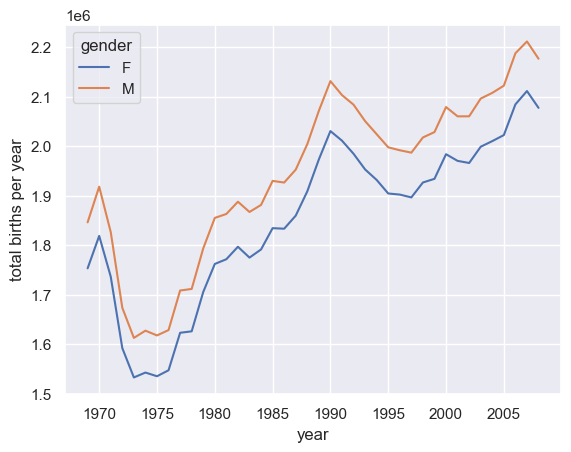

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # 使用Seaborn风格
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [249]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [250]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [251]:
# 将'day'列设置为整数。由于其中含有缺失值null，因此是字符串
births['day'] = births['day'].astype(int)

In [252]:
# 从年月日创建一个日期索引
births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births['dayofweek'] = births.index.dayofweek

C:\Users\ymm\AppData\Local\Temp\ipykernel_1100\2705260034.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])


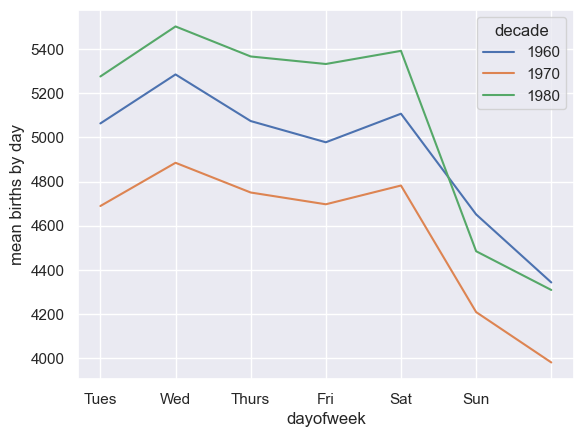

In [253]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [254]:
births_by_date = births.pivot_table('births',[births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [255]:
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

C:\Users\ymm\AppData\Local\Temp\ipykernel_1100\1588852318.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  births_by_date.index = [pd.datetime(2012, month, day)


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


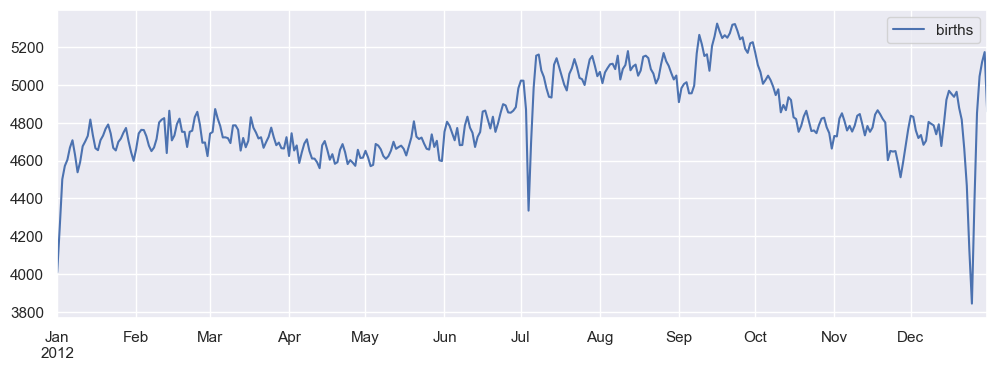

In [256]:
# 将结果画成图
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

## 3.11 向量化字符串操作

### 3.11.1 Pandas字符串操作简介

向量化操作简化了纯数值的数组操作语法——我们不需要再担心数组的长度或维度，只需
要关心需要的操作。

In [257]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [258]:
#  NumPy 并没有为字符串数组提供简单的接口，因此需要通过繁琐的 for 循环来解决问题：
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [259]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
# [s.capitalize() for s in data] # 'NoneType' object has no attribute 'capitalize'

In [260]:
import pandas as pd
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [261]:
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

### 3.11.2 Pandas字符串方法列表

In [262]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

#### 1. 与Python字符串方法相似的方法

Pandas 的 str 方法借鉴 Python 字符串方法的内容：

    len() lower() translate() islower()
    ljust() upper() startswith() isupper()
    rjust() find() endswith() isnumeric()
    center() rfind() isalnum() isdecimal()
    zfill() index() isalpha() split()
    strip() rindex() isdigit() rsplit()
    rstrip() capitalize() isspace() partition()
    lstrip() swapcase() istitle() rpartition()


In [263]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [264]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [265]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [266]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### 2. 使用正则表达式的方
![表3-4：Pandas向量化字符串方法与Python标准库的re模块函数的对应关系](../images/表3-4：Pandas向量化字符串方法与Python标准库的re模块函数的对应关系.PNG)

In [267]:
monte.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


In [268]:
# 正则表达式中的开始符号（^）与结尾符号（$）
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

#### 3. 其他字符串方法

![表3-5 其他Pandas字符串方法](../images/表3-5%20其他Pandas字符串方法.PNG)

## 3.12 处理时间序列

日期与时间数据主要包含三类:
* *时间戳*表示某个具体的时间点
* *时间间隔*与*周期*表示开始时间点与结束时间点之间的时间长度
* *时间增量（time delta）*或*持续时间（duration）*表示精确的时间长度

### 3.12.1 Python的日期与时间工具

#### 1. 原生Python的日期与时间工具：datetime与dateutil

In [2]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
from dateutil import parser
# dateutil 模块对各种字符串格式的日期进行正确解析：
date = parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [5]:
date.strftime('%A')

'Saturday'

#### 2. 时间类型数组：2. 时间类型数组：NumPy的datetime64类型

In [7]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [8]:
# 只要有了这个日期格式，就可以进行快速的向量化运算：
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

datetime64 与 timedelta64 对象的一个共同特点是，它们都是在基本时间单位
（fundamental time unit）的基础上建立的。

In [9]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [10]:
# 将时间单位设置为纳秒：
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

![表3-6：日期与时间单位格式代码](../images/表3-6：日期与时间单位格式代码.PNG)
![表3-6：日期与时间单位格式代码](../images/表3-6：日期与时间单位格式代码2.PNG)

#### 3. Pandas的日期与时间工具：理想与现实的最佳解决方案

Pandas 所有关于日期与时间的处理方法全部都是通过 Timestamp 对象实现的，它利用
numpy.datetime64 的有效存储和向量化接口将 datetime 和 dateutil 的易用性有机结合起来。

In [12]:
import numpy as np
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [13]:
date.strftime('%A')

'Saturday'

In [14]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

### 3.12.2 Pandas时间序列：用时间作索引

In [15]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [16]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [17]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

### 3.12.3 Pandas时间序列数据结构

* 针对时间戳数据，Pandas 提供了 Timestamp 类型。与前面介绍的一样，它本质上是
Python 的原生 datetime 类型的替代品，但是在性能更好的 numpy.datetime64 类型的基
础上创建。对应的索引数据结构是 DatetimeIndex。
* 针对时间周期数据，Pandas 提供了 Period 类型。这是利用 numpy.datetime64 类型将固
定频率的时间间隔进行编码。对应的索引数据结构是 PeriodIndex。
* 针对时间增量或持续时间，Pandas 提供了 Timedelta 类型。Timedelta 是一种代替 Python
原生 datetime.timedelta 类型的高性能数据结构，同样是基于 numpy.timedelta64 类型。
对应的索引数据结构是 TimedeltaIndex。

In [19]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                        '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [20]:
# 用 'D' 将数据转换成单日的时间序列：
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [21]:
# 当用一个日期减去另一个日期时，返回的结果是 TimedeltaIndex 类型：
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [22]:
# 有规律的时间序列：pd.date_range()
# pd.date_range() 可以处理时间戳
# pd.period_range() 可以处理周期
# pd.timedelta_range() 可以处理时间间隔
pd.date_range('2015-07-03', '2015-07-10')


DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [23]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [25]:
# 可以通过 freq 参数改变时间间隔，默认值是 D。
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [26]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [27]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

### 3.12.4 时间频率与偏移量

![表3-7：Pandas频率代码](../images/表3-7：Pandas频率代码.PNG)

![表3-8：带开始索引的频率代码](../images/表3-8：带开始索引的频率代码.PNG)

In [30]:
# 用小时（H）和分钟（T）的组合来实现 2 小时 30 分钟：
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [31]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### 3.12.5 重新取样、迁移和窗口

pandas-datareader获取数据的说明：
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [54]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016',
                       data_source='stooq')
goog.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,38.4750,38.4750,37.9170,37.9440,21400960
2015-12-30,38.8300,38.8800,38.3450,38.5500,17363480
2015-12-29,38.3345,38.9990,38.3215,38.8300,35300240
2015-12-28,37.6460,38.1495,37.4760,38.1255,30314320
2015-12-24,37.4775,37.5675,37.3310,37.4200,10544460


In [52]:
goog['Close']

Date
2015-12-31    37.9440
2015-12-30    38.5500
2015-12-29    38.8300
2015-12-28    38.1255
2015-12-24    37.4200
               ...   
2014-04-02    28.3500
2014-04-01    28.3580
2014-03-31    27.8485
2014-03-28    27.9995
2014-03-27    27.9230
Name: Close, Length: 446, dtype: float64

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

<Axes: xlabel='Date'>

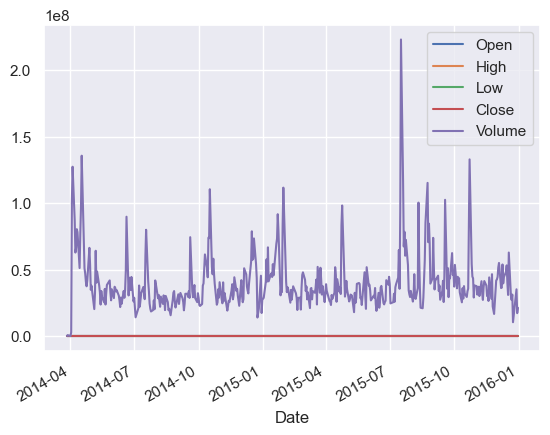

In [53]:
goog.plot()

#### 1. 重新取样与频率转换

resample() 方法是以数据累计（data aggregation）为基础，
asfreq() 方法是以数据选择（data selection）为基础。

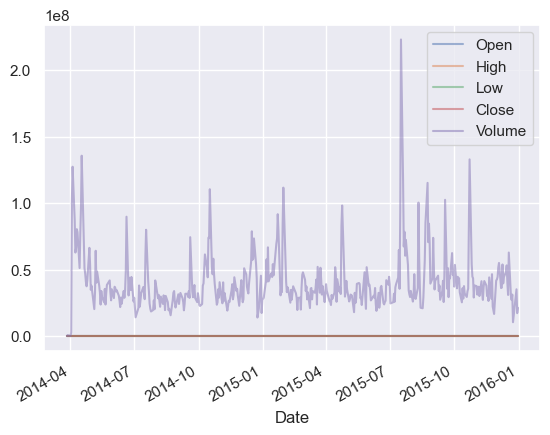

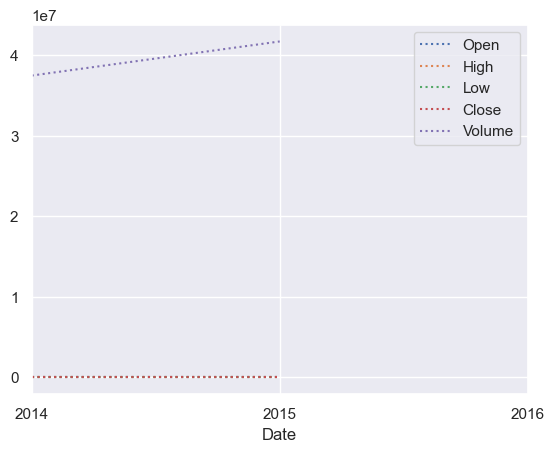

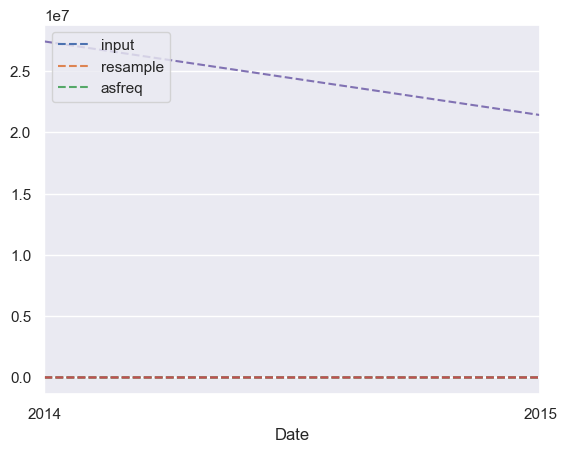

In [58]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

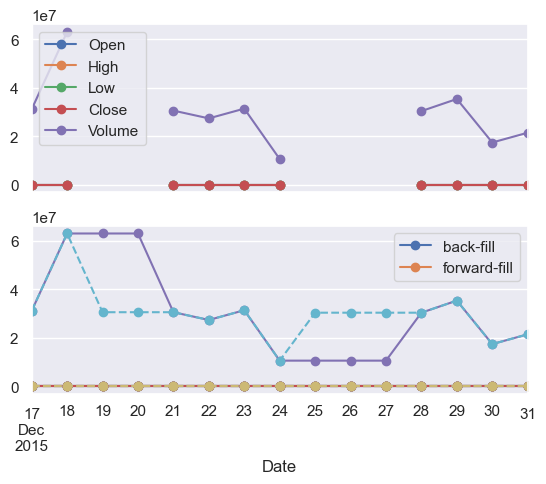

In [59]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

#### 2. 时间迁移

shift() 就是迁移数据，而 tshift() 就是迁移索引。
两种方法都是按照频率代码进行迁移。

C:\Users\ymm\AppData\Local\Temp\ipykernel_13664\663873885.py:6: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  goog.tshift(900).plot(ax=ax[2])


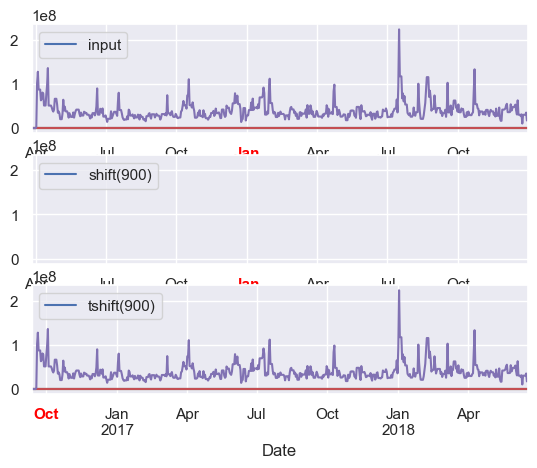

In [60]:
fig, ax = plt.subplots(3, sharey=True)
# 对数据应用时间频率，用向后填充解决缺失值
goog = goog.asfreq('D', method='pad')
goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])
# 设置图例与标签
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

C:\Users\ymm\AppData\Local\Temp\ipykernel_13664\2632432407.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  ROI = 100 * (goog.tshift(-365) / goog - 1)


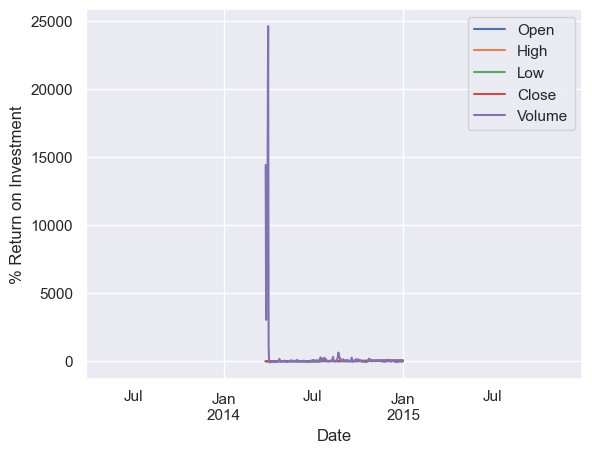

In [61]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

#### 3. 移动时间窗口

In [63]:
# rolling = goog.rolling(365, center=True)
# data = pd.DataFrame({'input': goog,
#                      'one-year rolling_mean': rolling.mean(),
#                      'one-year rolling_std': rolling.std()})
# ax = data.plot(style=['-', '--', ':'])
# ax.lines[0].set_alpha(0.3)

ValueError: If using all scalar values, you must pass an index